Gradient Boosted Machines trained on data subsets

In [1]:
import pandas as pd
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.ensemble import GradientBoostingRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import seaborn as sns
import glob
import os

# code to add to import from optichill folder
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from optichill import bas_filter

%matplotlib inline

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# Spring 2017 Training Data

Trained plant with 2017 February, March, and April minute data
Tested data from the rest of the year

In [2]:
lst_train = ['Plt1 m 2017-02.csv', 'Plt1 m 2017-03.csv', 'Plt1 m 2017-04.csv']
lst_test = [
    'Plt1 m 2016-11.csv', 'Plt1 m 2016-12.csv', 'Plt1 m 2017-01.csv',
    'Plt1 m 2017-05.csv', 'Plt1 m 2017-06.csv', 'Plt1 m 2017-07.csv',
    'Plt1 m 2017-08.csv', 'Plt1 m 2017-09.csv', 'Plt1 m 2017-10.csv',
    'Plt1 m 2017-11.csv', 'Plt1 m 2017-12.csv', 'Plt1 m 2018-01.csv',
    'Plt1 m 2018-02.csv', 'Plt1 m 2018-03.csv', 'Plt1 m 2018-04.csv'
]

In [3]:
df_train, df_test = bas_filter.train_single_plt(
    '../../Plt1', lst_train, lst_test,
    '../../Plt1/Plt1 Points List.xlsx',
    include_alarms=False, dim_remove=['CHWST', 'CDWVLV']
)
df_test.shape

Filtering Training Set
['../../Plt1\\Plt1 m 2017-02.csv']
['../../Plt1\\Plt1 m 2017-03.csv']
['../../Plt1\\Plt1 m 2017-04.csv']
Descriptors in the points list that are not in the datasets.
CommunicationFailure_COV
CH3COM1F
CH3Ready
CH4COM1F
CH4Ready
CH4SURGE
CH5COM1F
CH5Ready
Original data contains 25623 points and 413 dimensions.
A CDWP3SPD_Alarm was noted and 536 datapoints were removed from the dataset.
A CDWP4Failed was noted and 536 datapoints were removed from the dataset.
A CDWP4SPD_Alarm was noted and 878 datapoints were removed from the dataset.
A CDWP5Failed was noted and 878 datapoints were removed from the dataset.
A CDWP5SPD_Alarm was noted and 16375 datapoints were removed from the dataset.
A CH3_CHWSTSP_Alarm was noted and 16375 datapoints were removed from the dataset.
A CH3ALARM was noted and 16375 datapoints were removed from the dataset.
A CH3F was noted and 16375 datapoints were removed from the dataset.
A CH4_CHWSTSP_Alarm was noted and 16375 datapoints were remove

(43569, 191)

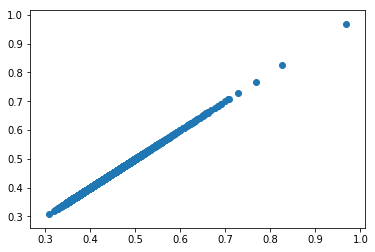

In [4]:
plt.scatter(df_train['kW/Ton'], df_train['kW/Ton'])

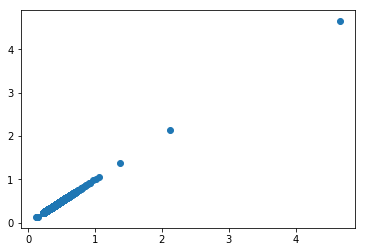

In [5]:
plt.scatter(df_test['kW/Ton'], df_test['kW/Ton'])

In [6]:
params = {'n_estimators': 500, 'max_depth': 6, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}

In [7]:
model = GradientBoostingRegressor(**params)

In [8]:
ytrain = df_train['kW/Ton'].values
ytest = df_test['kW/Ton'].values
xtrain = df_train.drop(['kW/Ton'], axis=1).values
xtest = df_test.drop(['kW/Ton'], axis=1).values

In [9]:
xtrain.shape

(8910, 190)

In [10]:
ytrain.shape

(8910,)

In [11]:
model.fit(xtrain, ytrain)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.01, loss='ls', max_depth=6, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=500, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [12]:
ypred = model.predict(xtest)

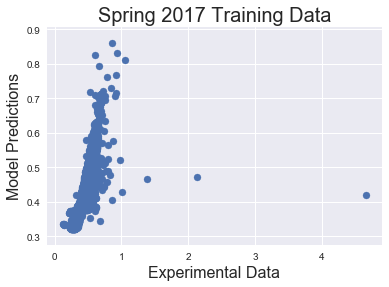

In [13]:
sns.set()
plt.figure()
plt.scatter(ytest, ypred)
fs = 20
plt.title("Spring 2017 Training Data", fontsize=fs)
plt.xlabel("Experimental Data", fontsize=fs-4)
plt.ylabel("Model Predictions", fontsize=fs-4)
plt.savefig('r2_values_spring_2017_plt1.png', bbox_inches='tight')

R2 value

In [14]:
test_score = r2_score(ytest, ypred)
test_score

0.76068430496202899

Feature Importance

In [15]:
feature_importance = model.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
x = df_test.drop(['kW/Ton'], axis=1).columns[sorted_idx]
imp = feature_importance[sorted_idx]

In [16]:
df_feats = pd.DataFrame({'feature_name': x, 'feat_import': imp})

In [17]:
df_feats

,feat_import,feature_name
0,0.000000,CDWVLV2
1,0.000000,CH5CHWVLV
2,0.000000,CH5CDWVLV
3,0.000000,CH5AVAIL
4,0.000000,CH5ALARM
5,0.000000,CH5_CHWSTSP_Alarm
6,0.000000,CH4SURGECNT
7,0.000000,CH4F
8,0.000000,CH4ALARM
9,0.000000,CH4_CHWSTSP_Alarm


In [18]:
df_feats.to_csv('Feat_imp_spring_test_plt1_2017.csv')